In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### gender_age excel 파일 불러오기
- 2015 ~ 2021년 데이터 가져오기
- 성별 계, 남자, 여자
- 연령별 합계

In [5]:
# gender_age excel파일 불러오기 (변수명 gender_age)
gender_age = pd.read_excel('gender_age.xlsx')

D:\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [6]:
def font_kor_fixed() :
    from matplotlib import font_manager, rc
    import platform 

    if platform.system() == 'Windows': 
        path = 'c:/Windows/Fonts/malgun.ttf'
        font_name = font_manager.FontProperties(fname=path).get_name()
        rc('font', family=font_name)
    elif platform.system() == 'Darwin':
        rc('font', family='AppleGothic')
    else: 
        print('Check your OS system')

font_kor_fixed()

### 전처리
- 컬럼명 변경: 성별 - gender, 연령별 - age
- gender, age(합계), 2015~2021 컬럼추출
-

In [7]:
# gender_age에서 성별 -> gender, 연령별 -> age 로 컬럼명 변경
gender_age = gender_age.rename(columns = {'가구주의 성별' : 'gender', '가구주의 연령별':'age'})

# gender_age info로 데이터 값 확인
gender_age.info()

# gender_age에서 gender, age, 2015~2021불러와서 gender_age02변수에 담기
gender_age02 = gender_age[['gender', 'age', '2015', '2016','2017','2018','2019','2020','2021']]

# gender_age02에서 age가 합계인 것만 추출하여 gender_02에 담기           행번호 1, 18, 35
gender_02 = gender_age02[gender_age02['age'] == '합계']
gender_02


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   행정구역별(시군구)  2 non-null      object
 1   gender      4 non-null      object
 2   age         52 non-null     object
 3   2015        52 non-null     object
 4   2016        52 non-null     object
 5   2017        52 non-null     object
 6   2018        52 non-null     object
 7   2019        52 non-null     object
 8   2020        52 non-null     object
 9   2021        52 non-null     object
dtypes: object(10)
memory usage: 4.2+ KB


,gender,age,2015,2016,2017,2018,2019,2020,2021
1,계,합계,5203440.0,5397615.0,5618677.0,5848594.0,6147516.0,6643354.0,7165788.0
18,남자,합계,2592963.0,2675861.0,2791849.0,2906320.0,3053733.0,3304398.0,3583770.0
35,여자,합계,2610477.0,2721754.0,2826828.0,2942274.0,3093783.0,3338956.0,3582018.0


In [8]:
# year 컬럼을 추가하기 위해 transpose()함수로 데이터프레임 전치하여 gender_t 변수에 넣기

gender_t = gender_02.transpose()
gender_t

,1,18,35
gender,계,남자,여자
age,합계,합계,합계
2015,5203440.0,2592963.0,2610477.0
2016,5397615.0,2675861.0,2721754.0
2017,5618677.0,2791849.0,2826828.0
2018,5848594.0,2906320.0,2942274.0
2019,6147516.0,3053733.0,3093783.0
2020,6643354.0,3304398.0,3338956.0
2021,7165788.0,3583770.0,3582018.0


In [9]:
# gender_t 데이터 프레임에서 age 칼럼의 데이터값(계, 남자, 여자)

gender_t.rename(columns = gender_t.iloc[0], inplace = True)
gender_t = gender_t.drop(gender_t.index[1])
gender_t = gender_t.drop(gender_t.index[0])
gender_t

,계,남자,여자
2015,5203440.0,2592963.0,2610477.0
2016,5397615.0,2675861.0,2721754.0
2017,5618677.0,2791849.0,2826828.0
2018,5848594.0,2906320.0,2942274.0
2019,6147516.0,3053733.0,3093783.0
2020,6643354.0,3304398.0,3338956.0
2021,7165788.0,3583770.0,3582018.0


In [10]:
# gender_single 변수에 인덱스 초기화, 인덱스에 값을 '년도'라는 컬럼으로 배치

gender_single = gender_t.reset_index(drop=False, inplace=False)
gender_single = gender_single.rename(columns = {'index' : '년도'})
gender_single 

,년도,계,남자,여자
0,2015,5203440.0,2592963.0,2610477.0
1,2016,5397615.0,2675861.0,2721754.0
2,2017,5618677.0,2791849.0,2826828.0
3,2018,5848594.0,2906320.0,2942274.0
4,2019,6147516.0,3053733.0,3093783.0
5,2020,6643354.0,3304398.0,3338956.0
6,2021,7165788.0,3583770.0,3582018.0


### 시각화

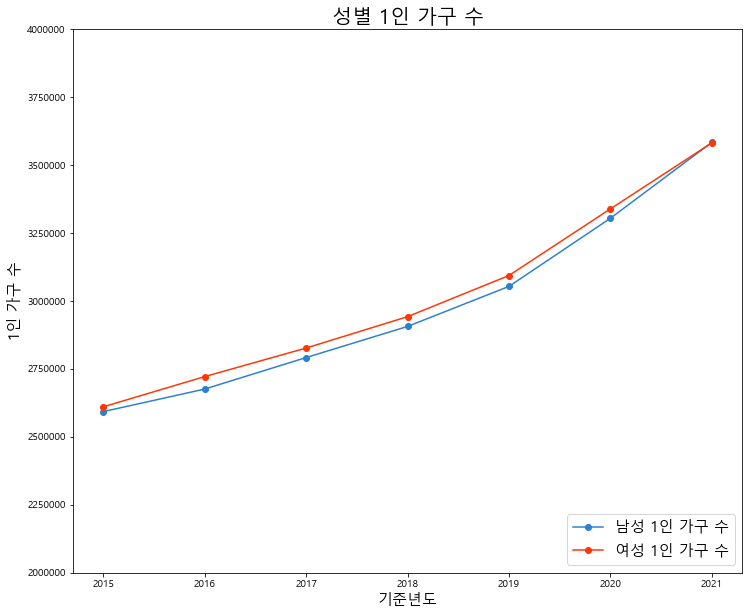

In [11]:
# 시계열 그래프 

# 한글 깨짐 방지 함수
font_kor_fixed()
## 그래프 크기 조절
plt.figure(figsize = (12,10))

## 그래프 내용 설정, label 이름, 색깔 설정
plt.plot(gender_single['년도'], gender_single['남자'], marker = 'o', label = '남성 1인 가구 수', color = '#2b81d0')
plt.plot(gender_single['년도'], gender_single['여자'], marker = 'o', label = '여성 1인 가구 수', color = '#ff3706')

## 범례 설정: '남성 1인 가구 수', '여성 1인 가구 수' 오른쪽 아래 범례
plt.legend(fontsize=15, loc=4)

## 그래프 타이틀, x축, y축 이름 달기
plt.title('성별 1인 가구 수', fontsize=20)
plt.xlabel('기준년도', fontsize= 15)
plt.ylabel('1인 가구 수', fontsize=15)

## 그래프 x축 값과 y축 값 설정 
values = ['2015','2016','2017','2018','2019','2020','2021']
plt.xticks(gender_single['년도'].values)

plt.ylim(2000000, 4000000)
plt.ticklabel_format(axis='y',useOffset=False, style='plain')

# plt.show()
plt.savefig('project_02_ppt_02.png', dpi =100)